In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##LOADING OF ROLLER COASTER DATASET

In [4]:
steel = pd.read_csv('/content/drive/MyDrive/MY PROJECT DATASETS/roller_coaster_starting/Golden_Ticket_Award_Winners_Steel.csv')
wood = pd.read_csv('/content/drive/MyDrive/MY PROJECT DATASETS/roller_coaster_starting/Golden_Ticket_Award_Winners_Wood.csv')

In [5]:
steel.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


In [6]:
wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [7]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [8]:
steel.isnull().any()

Rank            False
Name            False
Park            False
Location        False
Supplier        False
Year Built      False
Points          False
Year of Rank    False
dtype: bool

In [9]:
wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [10]:
wood.isnull().any()

Rank            False
Name            False
Park            False
Location        False
Supplier         True
Year Built      False
Points          False
Year of Rank    False
dtype: bool

In [11]:
wood[wood['Supplier'].isnull()]

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
125,46,Grizzly (KD),Kings Dominion,"Doswell, Va.",NaN,1982,81,2017


In [12]:
wood.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,1994.450000,392.388889,2016.500000
std,15.217246,24.309061,381.816130,1.388299
min,1.000000,1914.000000,66.000000,2013.000000
25%,8.000000,1994.000000,121.250000,2016.000000
50%,20.500000,2003.000000,213.500000,2017.000000
75%,35.250000,2009.000000,579.500000,2018.000000
max,50.000000,2017.000000,1625.000000,2018.000000


In [13]:
steel.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,2004.655556,325.433333,2016.500000
std,15.186377,9.511723,279.650322,1.388299
min,1.000000,1976.000000,59.000000,2013.000000
25%,8.000000,2000.000000,112.250000,2016.000000
50%,20.500000,2006.000000,246.000000,2017.000000
75%,35.250000,2012.000000,427.000000,2018.000000
max,50.000000,2018.000000,1354.000000,2018.000000


Renaming of the columns


In [14]:
wood.rename(columns={
    'Year Built': 'year_built',
    'Year of Rank': 'year_of_rank'
})

,Rank,Name,Park,Location,Supplier,year_built,Points,year_of_rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
...,...,...,...,...,...,...,...,...
175,46,Megafobia,Oakwood,"Pembrookshire, Wales",Custom Coasters,1996,84,2018
176,47,Hades 360,Mount Olympus,"Wisconsin Dells, Wis.",Gravity Group,2005,80,2018
177,48,Mine Blower,Fun Spot,"Kissimmee, Fla.",Gravity Group,2017,79,2018
178,49,Wooden Warrior,Quassy Amusement Park,"Meddlebury, Conn.",Gravity Group,2011,77,2018


In [15]:
steel.rename(columns={
    'Year Built': 'year_built',
    'Year of Rank': 'year_of_rank'
})

,Rank,Name,Park,Location,Supplier,year_built,Points,year_of_rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
...,...,...,...,...,...,...,...,...
175,46,Expedition Everest,Disney’s Animal Kingdom,"Orlando, Fla.",Vekoma,2006,82,2018
176,47,Storm Chaser,Kentucky Kingdom,"Louisville, Ky.",Rocky Mountain,2016,81,2018
177,48,Raging Bull,Six Flags Great America,"Gurnee, Ill.",B&M,1999,78,2018
178,49,Thunderbird,Holiday World,"Santa Claus, Ind.",B&M,2015,72,2018


### Writing a function that will plot a given roller coaster over time

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

In [19]:
def roller_coaster_time_plot(name_of_coaster, name_of_park, dataset):
  new_dataframe = dataset[(dataset['Name'] == name_of_coaster) & (dataset['Park'] == name_of_park)]
  fig, ax = plt.subplots()
  ax.plot(new_dataframe['Year of Rank'],new_dataframe.Rank)
  ax.set_yticks(new_dataframe.Rank.values)
  ax.set_xticks(new_dataframe['Year of Rank'].values)
  ax.invert_yaxis()
  plt.title(f"{name_of_coaster}")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.show()

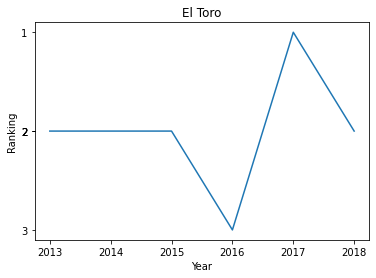

In [20]:
roller_coaster_time_plot('El Toro', 'Six Flags Great Adventure', wood)


Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

Call your function with "El Toro" as one roller coaster name, “Boulder Dash“ as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

In [26]:
def two_roller_coaster_rank_plot(roller_coster1, name_of_park1, roller_coster_2, name_of_park_2, dataset):
  ranking_of_coaster1 = dataset[(dataset['Name'] == roller_coster1) & (dataset['Park'] == name_of_park1)]
  ranking_of_coaster2 = dataset[(dataset['Name'] == roller_coster_2) & (dataset['Park'] == name_of_park_2)]
  fig, ax = plt.subplots()
  ax.plot(ranking_of_coaster1['Year of Rank'],ranking_of_coaster1['Rank'], color = 'blue', label = roller_coster1)
  ax.plot(ranking_of_coaster2['Year of Rank'],ranking_of_coaster2['Rank'], color = 'yellow', label = roller_coster_2)
  ax.invert_yaxis()
  plt.title("{} vs {} Rankings".format(roller_coster1,roller_coster_2))
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend()
  plt.show()

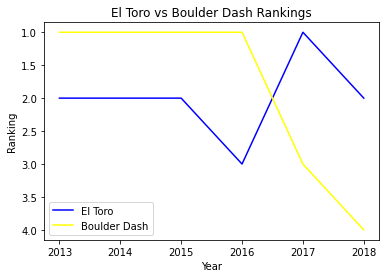

In [27]:
two_roller_coaster_rank_plot('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood)

In [40]:
def top_ranking_plot(dataset,n):
  new_set = dataset[dataset['Rank'] <= n]
  fig, ax = plt.subplots(figsize=(10,10))
  for name_of_coaster in set(new_set['Name']):
    name_of_coaster_rankings = new_set[new_set['Name'] == name_of_coaster]
    ax.plot(name_of_coaster_rankings['Year of Rank'],name_of_coaster_rankings['Rank'],label=name_of_coaster)
  ax.set_yticks([i for i in range(1,6)])
  ax.invert_yaxis()
  plt.title(f"Top 10 Rankings")
  plt.xlabel('Year')
  plt.ylabel('Ranking')
  plt.legend(loc=4)
  plt.show()

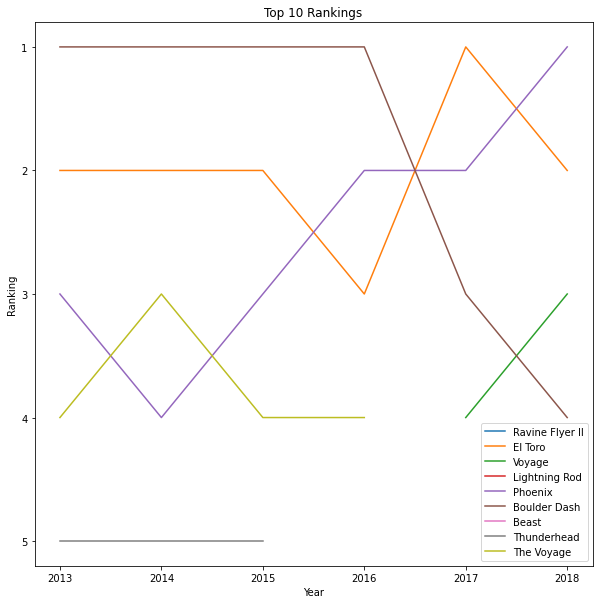

In [41]:
top_ranking_plot(wood,5)

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [43]:
roller_coasters = pd.read_csv('/content/drive/MyDrive/MY PROJECT DATASETS/roller_coaster_starting/roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

In [47]:
def histogram_plot(data, name_of_column):
  plt.hist(data[name_of_column].dropna())
  plt.title('Histogram of Roller Coaster {}'.format(name_of_column))
  plt.xlabel(name_of_column)
  plt.ylabel('Count')
  plt.show()

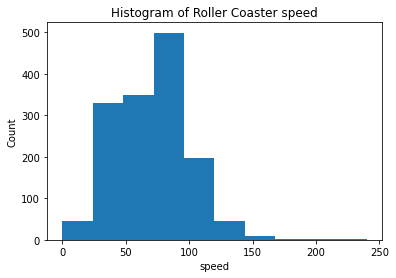

In [48]:
histogram_plot(roller_coasters, 'speed')


Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

In [50]:
def historgram_plot_of_height(data):
  heights = data[data['height'] <= 140]['height'].dropna()
  plt.hist(heights)
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()


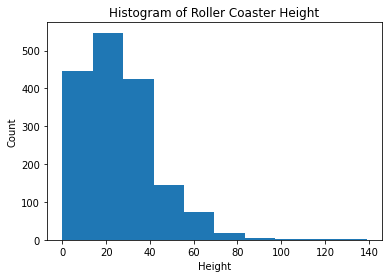

In [51]:
historgram_plot_of_height(roller_coasters)

Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

In [52]:
def plot_pie_chart(dataframe):
  coasters = dataframe[dataframe['status'] == 'status.operating']
  closed_coasters = dataframe[dataframe['status'] == 'status.closed.definitely']
  num_coasters = len(coasters)
  num_closed_coasters = len(closed_coasters)
  status_counts = [num_coasters,num_closed_coasters]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
  plt.axis('equal')
  plt.show()

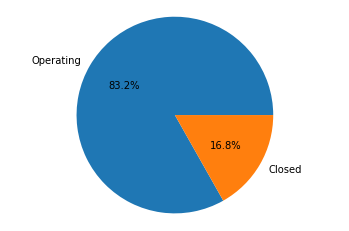

In [53]:
plot_pie_chart(roller_coasters)

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

In [54]:
def scatter_plot(datafram, colomn_one, column_two):
  plt.scatter(datafram[colomn_one],datafram[column_two])
  plt.title('Scatter Plot of {} vs. {}'.format(column_two,colomn_one))
  plt.xlabel(colomn_one)
  plt.ylabel(column_two)
  plt.show()

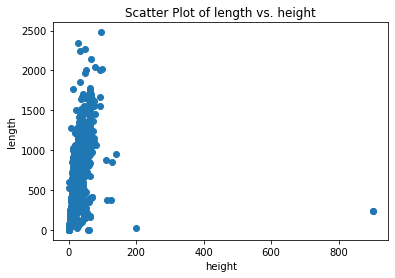

In [57]:
scatter_plot(roller_coasters, 'height', 'length')